In [5]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
#Importing the file
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [7]:
import pandas as pd
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data = data.drop('id', axis=1)

In [9]:
#Cleaning of data
#M-Malignant(has cancer) B-Benign(does not have cancer)
data['diagnosis'] = data['diagnosis'].replace('M', 1)
data['diagnosis'] = data['diagnosis'].replace('B', 0)

/tmp/ipython-input-9-1020957357.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace('B', 0)


In [10]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Convert 'M' to 1 and 'B' to 0 in the target variable
y = y.replace('M', 1)
y = y.replace('B', 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
#Random Forest Classifier(Bagging)
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.956140350877193


In [12]:
#AdaBoost Accuracy(Boosting)
model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(X_train, y_train)
pred_ada = model_ada.predict(X_test)
acc_ada = accuracy_score(y_test, pred_ada)
print("AdaBoost Accuracy:", acc_ada)

AdaBoost Accuracy: 0.9736842105263158


In [13]:
#XGBoost(Boosting)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

XGBoost Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:21:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Forest Confusion Matrix:
 [[72  0]
 [ 5 37]]


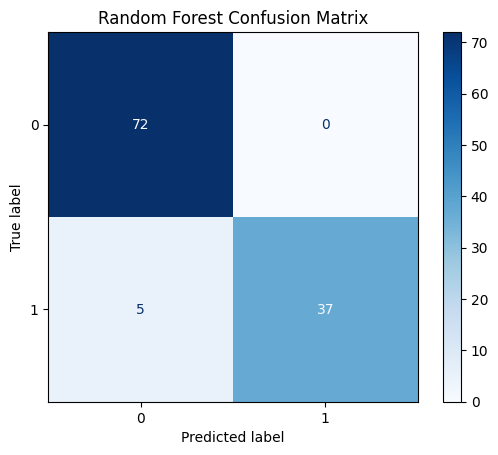

In [14]:
#Random Forest Confusion Matrix
cm_rfClassifier = confusion_matrix(y_test, pred_rf)
print("\nRandom Forest Confusion Matrix:\n", cm_rfClassifier)
ConfusionMatrixDisplay(cm_rfClassifier).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


AdaBoost Confusion Matrix:
 [[72  0]
 [ 3 39]]


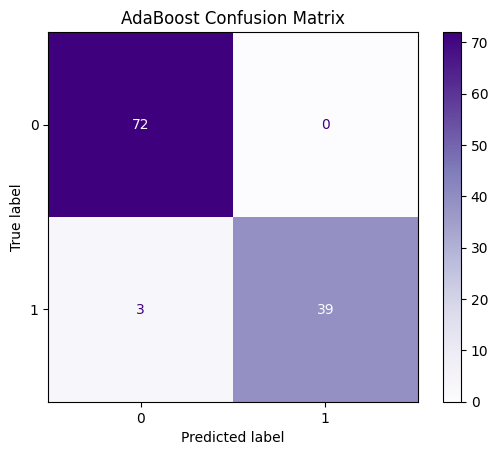

In [15]:
#AdaBoost Confusion Matrix
cm_adaBoost = confusion_matrix(y_test, pred_ada)
print("\nAdaBoost Confusion Matrix:\n", cm_adaBoost)
ConfusionMatrixDisplay(cm_adaBoost).plot(cmap='Purples')
plt.title("AdaBoost Confusion Matrix")
plt.show()


XGBoost Confusion Matrix:
 [[72  0]
 [ 5 37]]


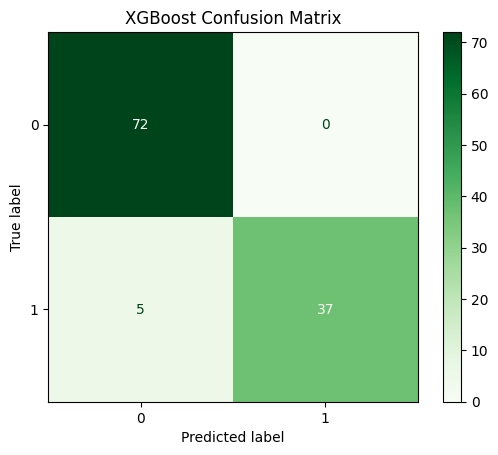

In [18]:
#XGBoost Confusion Matrix
cm_xgboost = confusion_matrix(y_test, pred_xgb)
print("\nXGBoost Confusion Matrix:\n", cm_xgboost)
ConfusionMatrixDisplay(cm_xgboost).plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy
acc_rf = accuracy_score(y_test, pred_rf)
acc_ada = accuracy_score(y_test, pred_ada)
acc_xgb = accuracy_score(y_test, pred_xgb)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"AdaBoost Accuracy: {acc_ada:.4f}")
print(f"XGBoost Accuracy: {acc_xgb:.4f}")

Random Forest Accuracy: 0.9561
AdaBoost Accuracy: 0.9737
XGBoost Accuracy: 0.9561
